In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
priceTransport = pd.read_csv('./data/car-data.csv')
priceTransport

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Я хочу посмотреть зависимость текущей цены(present_price) от пробега(Kms_driven)

In [3]:
# Remove unusing column
priceTransport = priceTransport.drop(columns=['Car_Name','Year','Selling_Price','Fuel_Type','Seller_Type','Transmission',	'Owner'])
priceTransport

,Present_Price,Kms_Driven
0,5.59,27000
1,9.54,43000
2,9.85,6900
3,4.15,5200
4,6.87,42450
...,...,...
296,11.60,33988
297,5.90,60000
298,11.00,87934
299,12.50,9000


In [4]:
priceTransport = priceTransport.sort_values(by=['Present_Price', 'Kms_Driven'])
priceTransport

,Present_Price,Kms_Driven
195,0.32,35000
183,0.47,21000
181,0.48,50000
173,0.51,1300
159,0.51,4000
...,...,...
59,35.96,41000
63,35.96,47000
62,35.96,78000
64,36.23,6000


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(priceTransport['Kms_Driven'], priceTransport['Present_Price'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

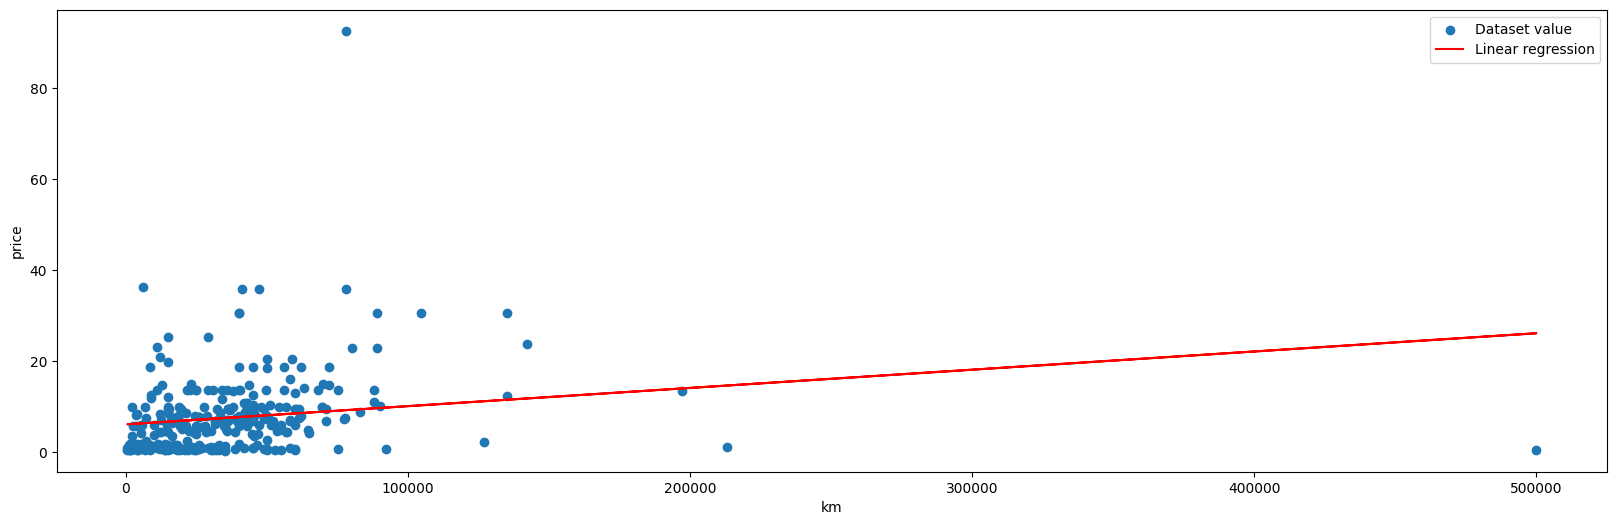

In [9]:
figure, ax = plt.subplots(figsize = (20, 6))
ax.scatter(priceTransport['Kms_Driven'], priceTransport['Present_Price'], label='Dataset value')
ax.plot(X_train, model.predict(X_train), c='r',label='Linear regression')
ax.legend()
ax.set_ylabel('price')
ax.set_xlabel('km')
plt.show()

Посчитаем метрику МАЕ

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))


MAE = 5.376551035129749
MSE = 52.59409725484866


Ошибки большие. На мой взгляд это связано с тем, что цена не сильно зависит от пробега